<a href="https://colab.research.google.com/github/sunflowerseed17/PythonDSProject/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Loading

In [1]:
# Installing modules, packages and dependencies
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

c:\Users\jgber\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load Folders containing preprocessed posts

folders = {
    "depression": {
        "path": "preprocessed_posts\depression",
        "label": 1  # Label for depression-related posts
    },
    "breastcancer": {
        "path": "preprocessed_posts\breastcancer",
        "label": 0  # Label for breast cancer posts
    }
}

In [3]:
folders = {
    "depression": {"path": r"preprocessed_posts/depression", "label": "depression"},
    "breastcancer": {"path": r"preprocessed_posts/breastcancer", "label": "breastcancer"},
}


In [5]:
# Initialize documents and labels lists
documents = []
labels = []

# Iterate through the folders
for category, data in folders.items():
    folder_path = data["path"]
    label = data["label"]

    # Ensure the folder_path is treated correctly
    folder_path = os.path.normpath(folder_path)  # Normalize path for the OS

    try:
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            if os.path.isfile(file_path):
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()  # Read the file content
                    documents.append(content)  # Add to documents list
                    labels.append(label)  # Add corresponding label
    except OSError as e:
        print(f"Error accessing folder {folder_path}: {e}")

# Check the loaded documents and labels
print(f"Loaded {len(documents)} documents.")
print(f"Labels: {set(labels)}")


Loaded 2258 documents.
Labels: {'breastcancer', 'depression'}


In [ ]:
def remove_empty_or_removed_files(output_folder):
    """
    Remove files that are empty or contain only the text "{removed}", "[removed]", 
    or contain the phrase "remov".
    
    :param output_folder: Path to the folder containing the text files.
    """
    removed_pattern = re.compile(r"^\s*(\[remov\]|\[removed\]|\{removed\})\s*$", re.IGNORECASE)

    for root, _, files in os.walk(output_folder):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                with open(filepath, "r", encoding="utf-8") as f:
                    content = f.read()
                    # Check for empty content, removed markers, or the phrase "remov"
                    if (not content.strip() or 
                        removed_pattern.match(content) or 
                        "remov" in content.lower()):
                        os.remove(filepath)
                        print(f"Removed file: {filepath}")
            except Exception as e:
                print(f"Error processing file {filepath}: {e}")

def organize_data_folders(base_folder):
    """
    Create raw and preprocessed subfolders under a main data folder.

    :param base_folder: Path to the main data folder.
    """
    raw_data_folder = os.path.join(base_folder, "raw")
    preprocessed_data_folder = os.path.join(base_folder, "preprocessed")

    os.makedirs(raw_data_folder, exist_ok=True)
    os.makedirs(preprocessed_data_folder, exist_ok=True)

    print(f"Raw data folder: {raw_data_folder}")
    print(f"Preprocessed data folder: {preprocessed_data_folder}")

# Example usage
if __name__ == "__main__":
    base_data_folder = "data"
    organize_data_folders(base_data_folder)
    # Example call to remove_empty_or_removed_files
    remove_empty_or_removed_files(os.path.join(base_data_folder, "raw"))


Raw data folder: data\raw
Preprocessed data folder: data\preprocessed
Error processing file data\raw\breastcancer_diagnosed_posts\breastcancer_1hsa7ux.txt: [WinError 32] The process cannot access the file because it is being used by another process: 'data\\raw\\breastcancer_diagnosed_posts\\breastcancer_1hsa7ux.txt'
Error processing file data\raw\breastcancer_diagnosed_posts\breastcancer_1hsi11y.txt: [WinError 32] The process cannot access the file because it is being used by another process: 'data\\raw\\breastcancer_diagnosed_posts\\breastcancer_1hsi11y.txt'
Error processing file data\raw\breastcancer_diagnosed_posts\breastcancer_1htw57s.txt: [WinError 32] The process cannot access the file because it is being used by another process: 'data\\raw\\breastcancer_diagnosed_posts\\breastcancer_1htw57s.txt'
Error processing file data\raw\breastcancer_diagnosed_posts\breastcancer_1huzhgt.txt: [WinError 32] The process cannot access the file because it is being used by another process: 'data\

In [16]:
print(f"Total documents loaded: {len(documents)}")
print(f"Total labels assigned: {len(labels)}")
print(f"Sample documents: {documents[:3]}")
print(f"Sample labels: {labels[:3]}")


Total documents loaded: 2258
Total labels assigned: 2258
Sample documents: ['guess countri', 'boyfriend hous young still live parent approxim 20 peopl famili parti even dinner put tv show beauti pageant miss franc proceed judg candid heard thing fat ugli ridicul leg short blond beauti other thin harmoni face worst women mostli men famili mostli quiet women judg other women fit stupid beauti standard societi creat even understand type tv show still exist objectifi deshuman judg women like would judg qualiti someth go consum use googl review section swear sometim wonder women like treat like shit like sexism girl wtf wrong black peopl would immedi call racist deshuman like let beauti pageant call miss mister black see peopl think yeah right would consid terribl peopl piec meat also peopl argu ye women choos beauti pageant sexist mind reason noth sexist anymor women choos sexist thing damn time stupid know better realli choic real limit lack educ sometim kinda prefer horribl toxic abus fa

## N-Grams

In [10]:
# Initialize TfidfVectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (unigrams and bigrams)
feature_names = vectorizer.get_feature_names_out()
print(f"Number of features (unigrams + bigrams): {len(feature_names)}")


Number of features (unigrams + bigrams): 101165


In [11]:
# Get feature names and the sum of TF-IDF scores across all documents
feature_names = vectorizer.get_feature_names_out()
tfidf_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Get indices of the top N most common features
top_n = 10  # Adjust to how many common features you want to see
top_indices = np.argsort(tfidf_sums)[-top_n:]  # Indices of top features

# Print the most common features
print(f"Top {top_n} Most Common Features:")
for i in reversed(top_indices):
    print(f"{feature_names[i]}: {tfidf_sums[i]:.4f}")


Top 10 Most Common Features:
remov: 171.6739
like: 43.1764
feel: 42.7798
want: 31.3994
know: 30.0473
year: 27.0377
time: 26.7620
think: 22.7675
day: 22.6633
cancer: 22.5313


### Extract TF-IDF features, train a logistic regression model with hyperparameter tuning, and identify key features for each category.

In [ ]:
# Debugging: Check documents and labels
print(f"Number of valid documents: {len(documents)}")
if documents:
    print(f"Sample document (label {labels[0]}): {documents[0]}")

# Initialize TfidfVectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L1 is not supported by LogisticRegression with liblinear solver
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# Train the best Logistic Regression model
classifier = grid_search.best_estimator_
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = classifier.coef_[0]  # No need to call .toarray() since coef_ is already a numpy array

# Get top 10 positive and negative features
top_positive_indices = np.argsort(coefficients)[-10:]  # Largest coefficients
top_negative_indices = np.argsort(coefficients)[:10]   # Smallest coefficients

print("\nTop 10 Positive Features (indicating depression):")
for i in reversed(top_positive_indices):
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

print("\nTop 10 Negative Features (indicating breast cancer):")
for i in top_negative_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

Number of valid documents: 2258
Sample document (label depression): guess countri
TF-IDF matrix shape: (2258, 101165)
Training set size: (1806, 101165)
Testing set size: (452, 101165)

Best Hyperparameters:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

breastcancer       0.97      0.86      0.91       224
  depression       0.87      0.97      0.92       228

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452

Accuracy: 0.92

Top 10 Positive Features (indicating depression):
depress: 1.9902
life: 1.9539
like: 1.2946
remov: 1.1813
parent: 1.1083
anymor: 1.0805
job: 1.0544
im: 1.0114
dont: 1.0079
peopl: 0.9761

Top 10 Negative Features (indicating breast cancer):
chemo: -3.7209
cancer: -3.5371
breast: -2.8687
surgeri: -2.8433
week: -2.3921
treatment: -2.3814
radiat: -2.0027
node: -1.8229
surgeon: -

### Visualize features from logistic regression model (bar plots and word clouds)




Label counts: Counter({'breastcancer': 1135, 'depression': 1123})


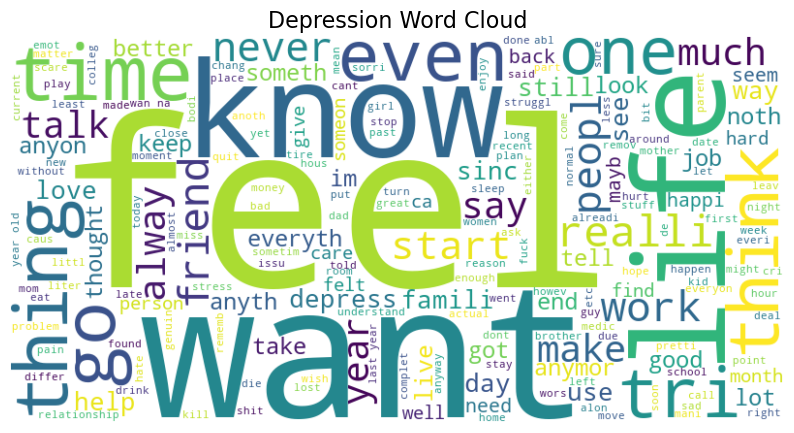

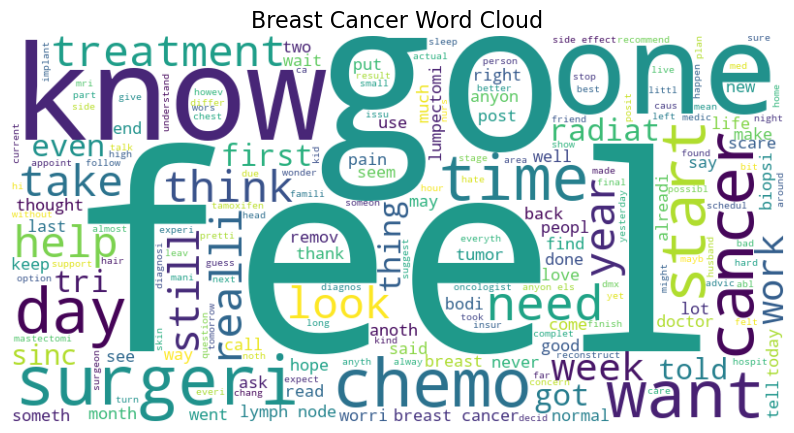

In [17]:
# Debugging: Print unique labels and their counts
from collections import Counter
label_counts = Counter(labels)
print(f"Label counts: {label_counts}")

# Combine all depression and breast cancer documents
depression_text = " ".join([documents[i] for i in range(len(labels)) if labels[i] == "depression"])
breast_cancer_text = " ".join([documents[i] for i in range(len(labels)) if labels[i] == "breastcancer"])

# Debugging: Check if texts have content
if not depression_text.strip():
    print("Warning: No documents found for label 1 (Depression).")
if not breast_cancer_text.strip():
    print("Warning: No documents found for label 0 (Breast Cancer).")

# Generate Word Clouds (only if text exists)
if depression_text.strip():
    generate_wordcloud(depression_text, "Depression Word Cloud")
else:
    print("No data available for depression text to generate a word cloud.")

if breast_cancer_text.strip():
    generate_wordcloud(breast_cancer_text, "Breast Cancer Word Cloud")
else:
    print("No data available for breast cancer text to generate a word cloud.")


### Save the output of the N-Gram for classification modelling

In [19]:
# Creating the unigram and bigram separation
# 1) Unigram Vectorizer
vectorizer_unigram = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
X_unigram = vectorizer_unigram.fit_transform(documents)
feature_names_unigram = vectorizer_unigram.get_feature_names_out()
print(f"Number of unigram features: {len(feature_names_unigram)}")

# 2) Bigram Vectorizer
vectorizer_bigram = TfidfVectorizer(ngram_range=(2,2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(documents)
feature_names_bigram = vectorizer_bigram.get_feature_names_out()
print(f"Number of bigram features: {len(feature_names_bigram)}")


Number of unigram features: 9611
Number of bigram features: 91554


In [20]:
# Saving the unigram and bigram matrices for training
# Folder path for saving
output_folder = "data/feature_extracted_data"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# File paths for saving
unigram_matrix_csv = os.path.join(output_folder, "unigram_features_with_labels.csv")
bigram_matrix_csv = os.path.join(output_folder, "bigram_features_with_labels.csv")

# Convert sparse matrices to dense format and add labels as a column
if not os.path.exists(unigram_matrix_csv):
    unigram_df = pd.DataFrame(X_unigram.toarray(), columns=feature_names_unigram)
    unigram_df['label'] = labels  # Add the label column
    unigram_df.to_csv(unigram_matrix_csv, index=False)
    print(f"Saved unigram matrix with labels to {unigram_matrix_csv}.")
else:
    print(f"Unigram matrix with labels already exists at {unigram_matrix_csv}.")

if not os.path.exists(bigram_matrix_csv):
    bigram_df = pd.DataFrame(X_bigram.toarray(), columns=feature_names_bigram)
    bigram_df['label'] = labels  # Add the label column
    bigram_df.to_csv(bigram_matrix_csv, index=False)
    print(f"Saved bigram matrix with labels to {bigram_matrix_csv}.")
else:
    print(f"Bigram matrix with labels already exists at {bigram_matrix_csv}.")


Unigram matrix with labels already exists at data/feature_extracted_data\unigram_features_with_labels.csv.
Bigram matrix with labels already exists at data/feature_extracted_data\bigram_features_with_labels.csv.


## Empath Feature Extraction

In [21]:
# Installing modules, packages and dependencies

import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
%pip install empath
from empath import Empath

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Initialising the Empath model
lexicon = Empath()

In [23]:
# Categories to focus on based on the origin paper. 
# The categories are divided into linguistic features, psychological processes, personal concerns, and time orientations.
# Since we cannot use the LIWC tool, we will use the Empath tool and define similar categorical features. 

selected_categories = {
    "linguistic_features": [
        "articles", "auxiliary_verbs", "adverbs", "conjunctions", 
        "personal_pronouns", "impersonal_pronouns", "negations", 
        "prepositions", "verbs", "nouns", "adjectives", 
        "comparatives", "superlatives", "modifiers", "function_words", 
        "filler_words", "verb_tense", "slang", "jargon", 
        "formal_language", "casual_language", "exclamations", 
        "contractions", "word_complexity", "sentiment_words"
    ],
        "psychological_processes": {
        "affective": [
            "positive_emotion", "negative_emotion", "joy", "anger", 
            "sadness", "anxiety", "fear", "disgust", "love", 
            "hope", "trust", "excitement", "anticipation", 
            "relief", "sympathy", "gratitude", "shame", 
            "guilt", "envy", "pride", "contentment", "confusion",
            "boredom", "embarrassment", "longing", "nostalgia", 
            "embarrassment", "frustration", "surprise", "melancholy"
        ],
        "biological": [
            "body", "health", "illness", "pain", "hygiene", 
            "fitness", "exercise", "nutrition", "ingestion", 
            "physical_state", "medicine", "sleep", "sexual", 
            "aging", "disease", "injury", "hospital", "recovery", 
            "dieting", "mental_health", "drug_use", "headache", 
            "fatigue", "hormones", "appetite"
        ],
        "social": [
            "family", "friends", "relationships", "group_behavior", 
            "teamwork", "social_media", "communication", "community", 
            "peer_pressure", "leadership", "parenting", "mentorship", 
            "marriage", "divorce", "gender_roles", "social_identity", 
            "cultural_rituals", "networking", "altruism", "conflict", 
            "social_support", "dominance", "affiliation", "intimacy", 
            "supportiveness", "competition", "conflict_resolution", 
            "collaboration", "in-group", "out-group", "prejudice"
        ],
        "cognitive": [
            "certainty", "doubt", "insight", "cause", "discrepancy", 
            "problem_solving", "creativity", "self_reflection", "planning", 
            "memory", "perception", "attention", "reasoning", "thought_process", 
            "decision_making", "confusion", "learning", "metacognition", "adaptability", 
            "focus", "perspective", "problem_analysis", "evaluation", "interpretation",
            "logic", "intelligence", "rational_thought", "intuition", "conceptualization"
        ],
        "drives": [
            "achievement", "dominance", "affiliation", "control", 
            "self-esteem", "autonomy", "self-assertion", "power", 
            "ambition", "conformity", "subordination", "dependence", 
            "submission", "accomplishment", "independence", "order", 
            "control_seeking", "status", "prosocial_behavior"
        ],
        "spiritual": [
            "spirituality", "faith", "beliefs", "sacred", "religion", 
            "prayer", "meditation", "afterlife", "soul", "divine", 
            "god", "higher_power", "inspiration", "transcendence", 
            "morality", "ethics", "rituals", "holiness", "mindfulness"
        ]
    },
    "personal_concerns": [
        "work", "money", "wealth", "shopping", "career", "travel", 
        "home", "school", "education", "violence", "death", 
        "retirement", "spirituality", "family_life", "hobbies", 
        "volunteering", "pets", "entertainment", "parenting", 
        "sports", "adventure", "politics", "environment", 
        "safety", "technology", "materialism", "status", 
        "self_improvement", "learning", "self_growth", "happiness", 
        "life_purpose", "work_life_balance", "stress", "coping", 
        "job_satisfaction", "ambition", "legacy", "job_search", 
        "unemployment", "retirement_plans", "mental_health", "dating", 
        "romantic_relationships", "divorce", "life_stressors", "transitions"
    ],
    "time_orientations": [
        "present", "past", "future", "morning", 
        "afternoon", "evening", "day", "night", 
        "weekdays", "weekends", "seasons", "holidays", 
        "lifespan", "long_term", "short_term", 
        "routine", "historical", "epoch", "momentary", 
        "timeliness", "timelessness", "urgency", 
        "progression", "nostalgia", "anticipation"
    ]
}

In [24]:
# Extracting features
def extract_empath_features(documents, lexicon, selected_categories):
    """
    Extracts Empath features from a list of documents based on selected categories.
    Parameters:
    documents (list of str): A list of documents to analyze.
    lexicon (Empath): An instance of the Empath lexicon for analyzing text.
    selected_categories (dict): A dictionary specifying the categories to extract. 
        It should have the following structure:
        {
            "linguistic_features": list of str,
            "psychological_processes": dict of {subcategory: list of str},
            "personal_concerns": list of str,
            "time_orientations": list of str
        }
    Returns:
    list of dict: A list of dictionaries where each dictionary contains the extracted features for a document.
    """

    features = []
    for doc in documents:
        doc_features = {}
        
        # Linguistic features
        for category in selected_categories["linguistic_features"]:
            doc_features[category] = lexicon.analyze(doc, categories=[category])[category]
        
        # Psychological processes
        for subcategory, categories in selected_categories["psychological_processes"].items():
            for category in categories:
                doc_features[category] = lexicon.analyze(doc, categories=[category])[category]
        
        # Personal concerns
        for category in selected_categories["personal_concerns"]:
            doc_features[category] = lexicon.analyze(doc, categories=[category])[category]
        
        # Time orientations
        for category in selected_categories["time_orientations"]:
            doc_features[category] = lexicon.analyze(doc, categories=[category])[category]
        
        features.append(doc_features)
    return features


In [25]:
# Extracting features for each document

empath_features = extract_empath_features(documents, lexicon, selected_categories)


In [30]:
# Convert features into a DataFrame
df_features = pd.DataFrame(empath_features)

# Remove constant columns
constant_columns = df_features.columns[df_features.nunique() == 1]
df_features = df_features.drop(columns=constant_columns)
print(f"Removed constant columns: {constant_columns.tolist()}")

# Validate labels
if len(set(labels)) == 1:
    raise ValueError("Labels array is constant; cannot compute correlation.")

# Calculate correlation and p-values for each feature
correlations = []
p_values = []

for column in df_features.columns:
    try:
        # Calculate Pearson correlation and p-value
        correlation, p_value = pearsonr(df_features[column], labels)
        correlations.append(correlation)
        p_values.append(p_value)
    except ValueError as e:  # Handle constant features
        print(f"Skipping feature {column} due to constant input.")
        correlations.append(None)
        p_values.append(None)

# Apply Benjamini-Hochberg correction
correction_results = multipletests(p_values, alpha=0.05, method="fdr_bh")
_, corrected_p_values, _, _ = correction_results

# Create a results DataFrame
correlation_results = pd.DataFrame({
    "Feature": df_features.columns,
    "Correlation": correlations,
    "P-Value": p_values,
    "Corrected P-Value": corrected_p_values
})

# Sort by the highest correlation (absolute value)
correlation_results = correlation_results.sort_values(by="Correlation", key=abs, ascending=False)

Removed constant columns: ['articles', 'auxiliary_verbs', 'adverbs', 'conjunctions', 'personal_pronouns', 'impersonal_pronouns', 'negations', 'prepositions', 'verbs', 'nouns', 'adjectives', 'comparatives', 'superlatives', 'modifiers', 'function_words', 'filler_words', 'verb_tense', 'slang', 'jargon', 'formal_language', 'casual_language', 'exclamations', 'contractions', 'word_complexity', 'sentiment_words', 'anxiety', 'hope', 'excitement', 'relief', 'gratitude', 'guilt', 'boredom', 'embarrassment', 'longing', 'nostalgia', 'frustration', 'melancholy', 'illness', 'fitness', 'nutrition', 'ingestion', 'physical_state', 'medicine', 'aging', 'disease', 'hospital', 'recovery', 'dieting', 'mental_health', 'drug_use', 'headache', 'fatigue', 'hormones', 'appetite', 'relationships', 'group_behavior', 'teamwork', 'community', 'peer_pressure', 'leadership', 'parenting', 'mentorship', 'marriage', 'divorce', 'gender_roles', 'social_identity', 'cultural_rituals', 'networking', 'altruism', 'conflict', '

### Outcome: 47 topics using Empath was appropriate instead of the 67 which the original paper found with LIWC 

### Saving the output of the EFE for classification modelling

In [27]:
# Saving the output of the Empath feature extraction
# Define output folder and file path
output_folder = "data/feature_extracted_data"
os.makedirs(output_folder, exist_ok=True)
correlation_results_file = os.path.join(output_folder, "empath_correlation_results.csv")

# Save the correlation results
correlation_results.to_csv(correlation_results_file, index=False)
print(f"Saved correlation results to {correlation_results_file}.")

# Add labels to the feature DataFrame
df_features["label"] = labels

# Save the features and labels
features_with_labels_file = os.path.join(output_folder, "empath_features_with_labels.csv")
df_features.to_csv(features_with_labels_file, index=False)
print(f"Saved features with labels to {features_with_labels_file}.")

NameError: name 'correlation_results' is not defined

## (For Table) Highest correlation results achieved with Empath features

In [28]:
# Create the initial DataFrame with features, correlations, and p-values
result_df = pd.DataFrame({
    "Feature": df_features.columns,
    "Correlation": correlations,
    "P-Value": corrected_p_values
})

# Add significance stars based on P-Value
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    return ''  # No significance

result_df['Significance'] = result_df['P-Value'].apply(significance_stars)

# Filter significant results
significant_results = result_df[result_df['Significance'] != '']

# Map features to their respective categories
def map_features_to_categories(features, selected_categories):
    grouped_results = {}
    for feature in features:
        for category, subcategories in selected_categories.items():
            if isinstance(subcategories, list):  # Flat category
                if feature in subcategories:
                    grouped_results.setdefault(category, []).append(feature)
            elif isinstance(subcategories, dict):  # Nested subcategories
                for subcategory, sub_features in subcategories.items():
                    if feature in sub_features:
                        grouped_results.setdefault(f"{category} - {subcategory}", []).append(feature)
    return grouped_results

# Map features to categories
grouped_results = map_features_to_categories(significant_results['Feature'], selected_categories)

# Format results into a new DataFrame
formatted_results = [
    {
        "Category": category,
        "Feature": feature,
        "Correlation": significant_results.loc[significant_results['Feature'] == feature, 'Correlation'].values[0],
        "P-Value": significant_results.loc[significant_results['Feature'] == feature, 'P-Value'].values[0],
        "Significance": significant_results.loc[significant_results['Feature'] == feature, 'Significance'].values[0],
    }
    for category, features in grouped_results.items()
    for feature in features
]

# Create the final formatted DataFrame
table_df = pd.DataFrame(formatted_results).sort_values(by=["Category", "Correlation"], ascending=[True, False])

# Add a combined "Correlation (P-Value)" column for display
table_df['Correlation (P-Value)'] = table_df.apply(
    lambda row: f"{row['Correlation']:.2f} ({row['Significance']})", axis=1
)

# Select relevant columns for display
final_table = table_df[['Category', 'Feature', 'Correlation (P-Value)']]

# Display the final table
print(final_table.to_string(index=False))


NameError: name 'df_features' is not defined

## Topic Modelling using LDA (Latent Dirichlet Allocation)

In [33]:
#installing modules, packages and dependencies

%pip install gensim
%pip install pyldavis 
%pip install nltk
%pip install plotly
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.manifold import TSNE


# Enable Jupyter Notebook integration
pyLDAvis.enable_notebook()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Separating the documents into depressed and non-depressed

non_depressed_docs = [doc for doc, label in zip(documents, labels) if label == 0]
depressed_docs = [doc for doc, label in zip(documents, labels) if label == 1]

In [35]:
# Training LDA models for depressed and non-depressed documents
# Download NLTK stopwords and punkt if not already done
nltk.download('stopwords')
nltk.download('punkt')
# Initialize the stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(doc):
    """Tokenize, remove stopwords, and apply stemming."""
    tokens = word_tokenize(doc.lower())  # Tokenize and lowercase the text
    filtered_tokens = [
        stemmer.stem(word) for word in tokens 
        if word.isalpha() and word not in stop_words  # Remove stopwords and non-alphabetic tokens
    ]
    return filtered_tokens

def filter_docs_by_word_count(processed_docs, min_documents):
    """Filter words that appear in more than 'min_documents' docs."""
    word_doc_count = defaultdict(int)
    for doc in processed_docs:
        unique_words = set(doc)
        for word in unique_words:
            word_doc_count[word] += 1
    
    return [
        [word for word in doc if word_doc_count[word] > min_documents] 
        for doc in processed_docs
    ]

def create_corpus_and_dictionary(filtered_docs):
    """Create a dictionary and corpus from the filtered documents."""
    dictionary = corpora.Dictionary(filtered_docs)
    corpus = [dictionary.doc2bow(doc) for doc in filtered_docs]
    return dictionary, corpus

def train_lda(corpus, dictionary, num_topics=70, passes=15):
    """Train an LDA model."""
    return LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

def process_and_train_lda(docs, min_documents=10, num_topics=70, passes=15):
    """Preprocess, filter, and train LDA on the provided documents."""
    processed_docs = [preprocess(doc) for doc in docs]  # Preprocess documents
    filtered_docs = filter_docs_by_word_count(processed_docs, min_documents)  # Filter docs by word count
    dictionary, corpus = create_corpus_and_dictionary(filtered_docs)  # Create corpus and dictionary
    lda_model = train_lda(corpus, dictionary, num_topics, passes)  # Train LDA model
    return lda_model, dictionary, corpus

# Train LDA models for depressed and non-depressed documents
lda_non_depressed, non_depressed_dictionary, non_depressed_corpus = process_and_train_lda(non_depressed_docs)
lda_depressed, depressed_dictionary, depressed_corpus = process_and_train_lda(depressed_docs)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nataszasiwinska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nataszasiwinska/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Visualizing for non-depressed topics

NUM_TOPICS = 30  # Reduce to a manageable number

# Modify the process_and_train_lda function to use the adjusted number of topics
lda_non_depressed, non_depressed_dictionary, non_depressed_corpus = process_and_train_lda(
    non_depressed_docs, min_documents=10, num_topics=NUM_TOPICS, passes=15
)

lda_depressed, depressed_dictionary, depressed_corpus = process_and_train_lda(
    depressed_docs, min_documents=10, num_topics=NUM_TOPICS, passes=15
)

def visualize_lda(lda_model, corpus, dictionary):
    """Visualize the LDA model directly in the notebook."""
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    return vis  # Return the visualization object

# Visualize for non-depressed topics
print("Visualizing Non-Depressed Topics:")
visualize_lda(lda_non_depressed, non_depressed_corpus, non_depressed_dictionary)

Visualizing Non-Depressed Topics:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.064211 -0.102988       1        1  12.408262
24    -0.195892  0.074054       2        1   8.029107
13    -0.100210  0.012352       3        1   7.335215
27     0.117000 -0.042493       4        1   5.831763
3      0.182264  0.111275       5        1   4.340547
16     0.103313 -0.070418       6        1   4.207674
1     -0.148896  0.142026       7        1   4.074961
20    -0.142269  0.123293       8        1   4.022150
26     0.018279  0.011933       9        1   3.982617
14     0.077094  0.149762      10        1   3.762763
19     0.117067 -0.052830      11        1   3.710395
9      0.074280 -0.005912      12        1   3.648135
23     0.174058  0.000948      13        1   3.430254
17    -0.094195 -0.113678      14        1   3.352600
15    -0.043403  0.096711      15        1   3.348678
7     -0.016161 -0.077689      16        1   3.202046
22    -0.105665 -0.123366      17        1   2.957027
0     -0.141972 -0.108870      18        1   2.919262
8      0.044719  0.031507      19        1   2.138596
18    -0.057720 -0.055160      20        1   2.069700
10     0.072591  0.087180      21        1   1.855714
21    -0.023244 -0.125786      22        1   1.716505
4      0.016080 -0.148107      23        1   1.713812
25     0.180562  0.147180      24        1   1.576121
2      0.148530 -0.086483      25        1   1.304337
28    -0.137893  0.090303      26        1   1.138878
11    -0.127810  0.006373      27        1   0.997467
5     -0.014924  0.019012      28        1   0.645172
12    -0.021279  0.004542      29        1   0.140121
29    -0.018515  0.005328      30        1   0.140121, topic_info=      Term       Freq      Total Category  logprob  loglift
5     feel  48.000000  48.000000  Default  30.0000  30.0000
46  breast  24.000000  24.000000  Default  29.0000  29.0000
33   start  33.000000  33.000000  Default  28.0000  28.0000
51    node  26.000000  26.000000  Default  27.0000  27.0000
14    time  26.000000  26.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
7       go   0.031557  35.362906  Topic30  -4.1355  -0.4512
17    know   0.031384  30.595250  Topic30  -4.1410  -0.3119
57    like   0.031480  41.930961  Topic30  -4.1379  -0.6240
1     back   0.031300  31.692929  Topic30  -4.1437  -0.3498
0    anyon   0.030949  32.359573  Topic30  -4.1549  -0.3819

[1117 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
15        1  0.190575  also
15        3  0.047644  also
15        5  0.142932  also
15        6  0.095288  also
15        9  0.047644  also
...     ...       ...   ...
54       16  0.031541  year
54       18  0.031541  year
54       20  0.031541  year
54       22  0.031541  year
54       24  0.094622  year

[664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 25, 14, 28, 4, 17, 2, 21, 27, 15, 20, 10, 24, 18, 16, 8, 23, 1, 9, 19, 11, 22, 5, 26, 3, 29, 12, 6, 13, 30])

In [37]:
# Visualizing for depressed topics
print("Visualizing Depressed Topics:")
visualize_lda(lda_depressed, depressed_corpus, depressed_dictionary)

Visualizing Depressed Topics:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27    -0.014709 -0.036925       1        1  19.382709
29    -0.003275  0.072192       2        1  19.211481
24     0.004114 -0.013730       3        1  19.148907
6     -0.003908  0.004016       4        1   7.870463
16     0.022817  0.010104       5        1   4.201662
5      0.025130 -0.063132       6        1   3.063898
15    -0.059402  0.000452       7        1   2.524900
1      0.030118  0.029235       8        1   2.428210
11     0.056741 -0.011613       9        1   2.406676
28    -0.023460 -0.141886      10        1   2.225606
12     0.003879 -0.064395      11        1   1.779873
21    -0.019035 -0.019947      12        1   1.755113
2     -0.009246 -0.000552      13        1   1.616937
26    -0.034555  0.005849      14        1   1.386371
20     0.033706 -0.092902      15        1   1.364738
18     0.040907 -0.055893      16        1   1.322979
14    -0.060955 -0.108642      17        1   1.270215
23    -0.154983  0.117301      18        1   1.242587
25     0.026863 -0.028971      19        1   0.932096
0     -0.042507 -0.076102      20        1   0.904964
7     -0.229808  0.084371      21        1   0.818566
22     0.006715 -0.058888      22        1   0.675460
13     0.054578 -0.027260      23        1   0.574660
4      0.103221 -0.045668      24        1   0.495393
8      0.174226  0.127132      25        1   0.473817
3      0.060641  0.164593      26        1   0.397510
17    -0.111392  0.022878      27        1   0.358763
10     0.034429  0.069082      28        1   0.110733
19     0.044648  0.069310      29        1   0.027357
9      0.044502  0.069991      30        1   0.027357, topic_info=       Term        Freq       Total Category  logprob  loglift
14     feel  659.000000  659.000000  Default  30.0000  30.0000
104    like  601.000000  601.000000  Default  29.0000  29.0000
158   would  318.000000  318.000000  Default  28.0000  28.0000
130    want  405.000000  405.000000  Default  27.0000  27.0000
224  friend  229.000000  229.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
173    time    0.014738  309.778027  Topic30  -6.2402  -1.7492
9      even    0.014733  333.833005  Topic30  -6.2405  -1.8243
130    want    0.014694  405.010321  Topic30  -6.2432  -2.0203
303    take    0.014640  122.093570  Topic30  -6.2468  -0.8248
92    first    0.014616   83.409277  Topic30  -6.2485  -0.4455

[1676 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
160       1  0.160867      abl
160       2  0.060325      abl
160       4  0.382060      abl
160       5  0.080434      abl
160       9  0.060325      abl
...     ...       ...      ...
471       8  0.069725  younger
471       9  0.069725  younger
471      13  0.069725  younger
471      15  0.069725  younger
471      23  0.069725  younger

[4848 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 30, 25, 7, 17, 6, 16, 2, 12, 29, 13, 22, 3, 27, 21, 19, 15, 24, 26, 1, 8, 23, 14, 5, 9, 4, 18, 11, 20, 10])

### Outcomes: 30 topics using LDA was appropriate instead of the 70 which the original paper found 

In [38]:
# Extract topic distributions for non-depressed documents
non_depressed_topic_distributions = [
    dict(lda_non_depressed.get_document_topics(doc, minimum_probability=0))
    for doc in non_depressed_corpus
]

# Extract topic distributions for depressed documents
depressed_topic_distributions = [
    dict(lda_depressed.get_document_topics(doc, minimum_probability=0))
    for doc in depressed_corpus
]

# Convert to matrices (rows=documents, columns=topics)
def topic_distribution_to_matrix(topic_distributions, num_topics):
    matrix = np.zeros((len(topic_distributions), num_topics))
    for i, distribution in enumerate(topic_distributions):
        for topic_id, prob in distribution.items():
            matrix[i, topic_id] = prob
    return matrix

non_depressed_matrix = topic_distribution_to_matrix(non_depressed_topic_distributions, NUM_TOPICS)
depressed_matrix = topic_distribution_to_matrix(depressed_topic_distributions, NUM_TOPICS)


# Combine matrices for t-SNE visualization
combined_matrix = np.vstack((non_depressed_matrix, depressed_matrix))

# Create labels: 0 for non-depressed, 1 for depressed
labels = [0] * len(non_depressed_matrix) + [1] * len(depressed_matrix)

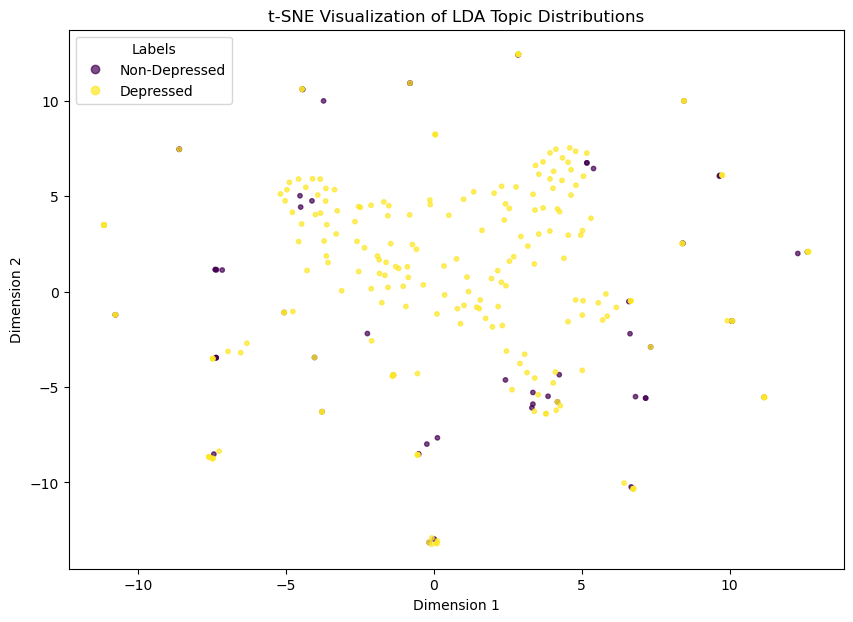

In [40]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
tsne_results = tsne.fit_transform(combined_matrix)

# Visualize the results
plt.figure(figsize=(10, 7))

scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=["Non-Depressed", "Depressed"], title="Labels")
plt.title("t-SNE Visualization of LDA Topic Distributions")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### Saving the output of the LDA for classification modelling

In [42]:
# Saving the LDA features and labels
# Folder for saving outputs
# Folder for saving outputs
output_folder = "data/feature_extracted_data"
os.makedirs(output_folder, exist_ok=True)

# File paths
lda_features_file = os.path.join(output_folder, "lda_topic_distributions_with_labels.csv")

# Check and save topic distributions and labels
if not os.path.exists(lda_features_file):
    # Combine topic distributions and labels into a DataFrame
    topic_distributions = np.vstack((non_depressed_matrix, depressed_matrix))
    labels_array = np.array(labels)
    lda_features_df = pd.DataFrame(topic_distributions)
    lda_features_df['label'] = labels_array  # Add labels as the last column

    # Save to CSV
    lda_features_df.to_csv(lda_features_file, index=False)
    print(f"Saved LDA topic distributions and labels to {lda_features_file}.")
else:
    print(f"LDA topic distributions file already exists at {lda_features_file}.")


LDA topic distributions file already exists at data/feature_extracted_data/lda_topic_distributions_with_labels.csv.
